<a href="https://colab.research.google.com/github/Renggobawaniw/Stroke-Prediction/blob/main/REVISI_SI611014_RENGGO_BAWANI_WIJAYANINGRUM_ASSIGMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RENGGO BAWANI WIJAYANINGRUM**
## **SI611014**
## **Kelas SI6-11**
## ** UNIVERSITAS MUHAMMADIYAH SURAKARTA

---

# DATASET
## https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

---



---



## PROBLEM
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Stroke Prediction


# **1. Data Preparation**

##1.1 Mengimpor library yang **diperlukan**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1.2 Membuat dan menampilkan dataframe

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##1.3 Mengecek data informasi pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##1.4 Memeriksa data jika ada yang Missing Value

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah Missing Value per Fitur:\n", missing_values)


Jumlah Missing Value per Fitur:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


pada penejalasan diatas kita tahu bawa terdapat missing value yaitu bmi untuk mengukur berat badan manusia untuk mengetahui apakh merupakan terdeteksi penyakit stroke

##1.5 Mengatasi Missing Value

In [ ]:
# Mengganti nilai yang hilang pada kolom 'bmi' dengan nilai rata-rata
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

# Menampilkan jumlah missing value setelah penanganan
missing_values_after = df.isnull().sum()
print("\nJumlah Missing Value setelah Penanganan:\n", missing_values_after)



Jumlah Missing Value setelah Penanganan:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


setelah semua data sudah dihapus yang terdapat mising valuenya nilainya nol semua,jadi sama

##2. Data Exploring/Exploratory Data Analysis (EDA)

###2.1 Visualize Fitur Target

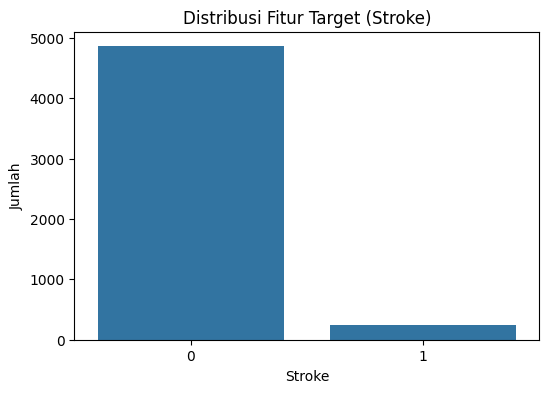

In [ ]:
# Visualisasi Fitur Target (Stroke)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stroke')
plt.title('Distribusi Fitur Target (Stroke)')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')
plt.show()


###2.2 Exploring The Data

In [ ]:
# Menghapus kolom non-numerik sebelum menghitung korelasi
numeric_df = df.select_dtypes(include=['float64', 'int64'])

Text(0, 0.5, 'Frekuensi')

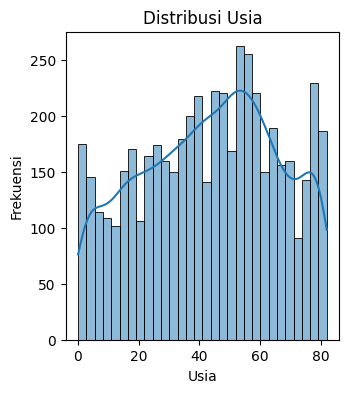

In [ ]:
# Visualisasi Distribusi Fitur Numerik
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(numeric_df['age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

Melalui histogram, kita dapat melihat pola distribusi usia pasien dalam dataset, apakah usia cenderung terpusat di sekitar nilai tertentu atau tersebar secara merata.

Text(0, 0.5, 'Frekuensi')

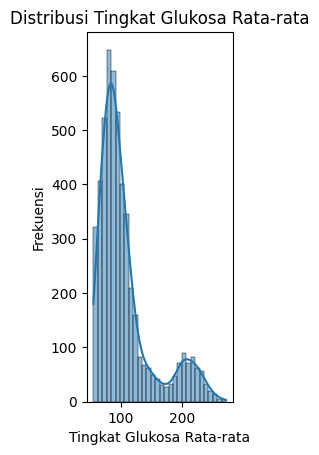

In [ ]:
plt.subplot(1, 3, 2)
sns.histplot(numeric_df['avg_glucose_level'], bins=30, kde=True)
plt.title('Distribusi Tingkat Glukosa Rata-rata')
plt.xlabel('Tingkat Glukosa Rata-rata')
plt.ylabel('Frekuensi')

Grafik ini membantu kita memahami sebaran nilai tingkat glukosa dalam populasi, apakah ada pola tertentu yang muncul dalam distribusi tingkat glukosa.


Text(0, 0.5, 'Frekuensi')

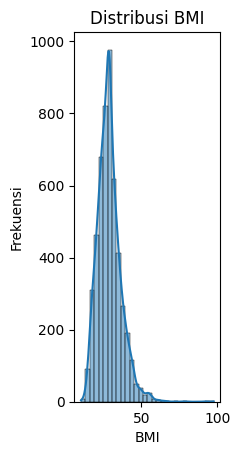

In [ ]:
plt.subplot(1, 3, 3)
sns.histplot(numeric_df['bmi'], bins=30, kde=True)
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')

Histogram membantu kita melihat seberapa banyak pasien yang memiliki BMI di rentang tertentu, sehingga kita dapat memahami pola distribusi BMI dalam dataset.

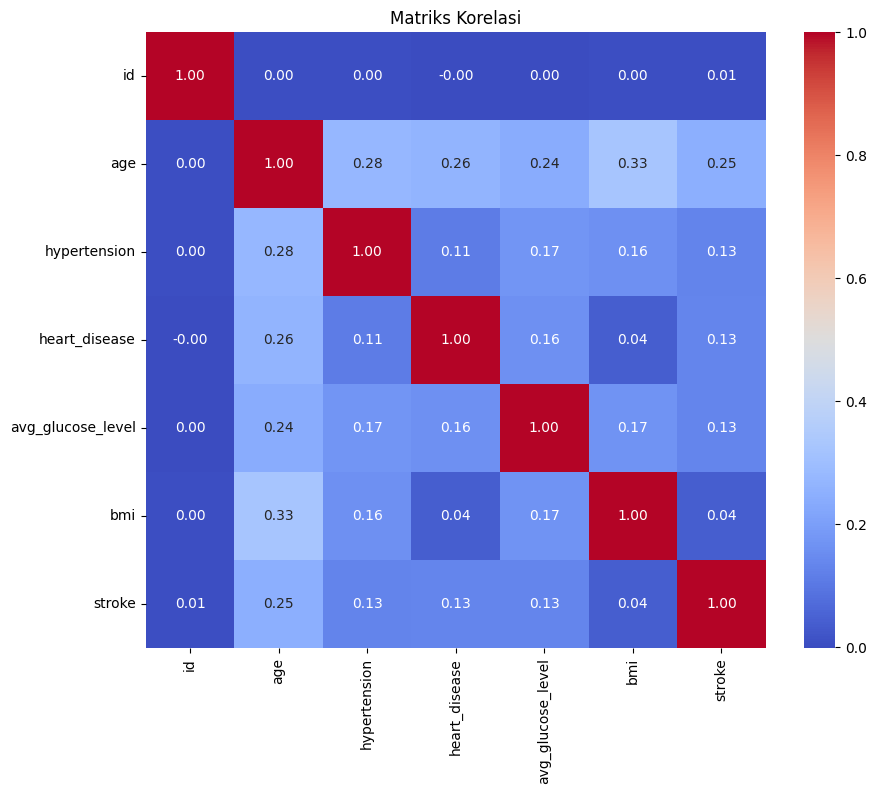

In [ ]:
# Pengecekan Korelasi
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

Dengan heatmap, kita dapat melihat hubungan korelasi antara fitur-fitur numerik. Korelasi tinggi antara dua fitur menunjukkan bahwa ada hubungan yang kuat antara keduanya, sementara korelasi rendah menunjukkan hubungan yang lemah atau tidak ada hubungan sama sekali.

###2.3 Kesimpulan EDA



*   Usia (Age): Distribusi usia pasien cenderung terpusat di sekitar nilai 40-60 tahun, dengan sebagian kecil pasien berusia di bawah 20 tahun.
*   Tingkat Glukosa Rata-rata (Average Glucose Level): Distribusi tingkat glukosa rata-rata dalam darah terdistribusi secara normal dengan sedikit skewness ke kanan.
BMI (Body Mass Index): Distribusi BMI pasien menunjukkan kecenderungan normal dengan sebagian besar pasien memiliki BMI di sekitar rentang 20-40.

*   Korelasi Antara Fitur Numerik:
Korelasi antara fitur numerik tampaknya cukup rendah, dengan tidak ada korelasi yang signifikan (bernilai mendekati 1 atau -1) antara fitur-fitur tersebut. Ini menunjukkan bahwa fitur-fitur tersebut mungkin berkontribusi secara independen terhadap prediksi penyakit stroke.
*   Distribusi Fitur Target (Stroke):
Distribusi fitur target (stroke) menunjukkan ketidakseimbangan, dengan jumlah kasus stroke yang jauh lebih sedikit daripada non-stroke. Hal ini menunjukkan perlunya penanganan ketidakseimbangan kelas saat membangun model prediksi.

*   Melalui eksplorasi data ini, kita mendapatkan wawasan awal tentang karakteristik dataset, termasuk distribusi fitur numerik dan distribusi target. Selanjutnya, wawasan ini akan membantu dalam pemilihan fitur, pemrosesan data lebih lanjut, dan pengembangan model prediksi penyakit stroke.





##3. Data Preprocessing

##3.1 Menghapus kolom yang tidak berguna / terpakai

In [ ]:
#Hapus Kolom 'id'
df_processed = df.drop(columns=['id'])

##3.2 NORMALISASI

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Normalisasi fitur kategori
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Tampilkan hasil normalisasi
print(df.head())


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


##3.3 Melakukan Smote untuk menangani ketidakseimbangan kelas dalam dataset

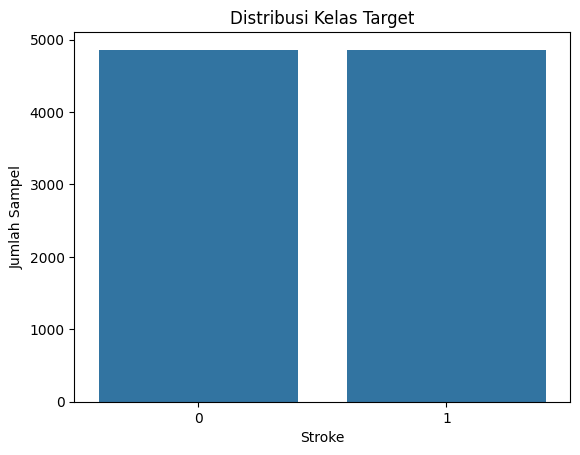

In [ ]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
X = df.loc[:, df.columns != 'stroke']
y = df['stroke']

smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=78)

X_smote, y_smote = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

#Menampilkan Visual bukti bahwa data sudah seimbang
sns.countplot(x='stroke', data=df)
plt.title('Distribusi Kelas Target')
plt.xlabel('Stroke')
plt.ylabel('Jumlah Sampel')
plt.show()


In [ ]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur dan target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Cek ukuran data awal
print("Ukuran data awal:")
print("Jumlah baris dan kolom:", X.shape)

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data latih dan data uji
print("\nUkuran data latih:")
print("Jumlah baris dan kolom:", X_train.shape)
print("\nUkuran data uji:")
print("Jumlah baris dan kolom:", X_test.shape)


Ukuran data awal:
Jumlah baris dan kolom: (9722, 11)

Ukuran data latih:
Jumlah baris dan kolom: (7777, 11)

Ukuran data uji:
Jumlah baris dan kolom: (1945, 11)


###3.1 Handling Missing Values (Penanganan Nilai yang Hilang)

In [ ]:
# # Mengganti nilai yang hilang pada kolom 'bmi' dengan nilai rata-rata
# mean_bmi = df['bmi'].mean()
# # df['bmi'].fillna(mean_bmi, inplace=True)

# # Menghapus other pada gender
# df.drop(df[(df['gender'] == 'Other')].index, inplace=True)

###3.2 Encoding Categorical Features (Pengkodean Fitur Kategorikal)


In [ ]:
# # Melakukan one-hot encoding pada fitur kategorikal
# df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

###3.3 Feature Scaling (Penskalaan Fitur)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Inisialisasi penskalaan
# scaler = StandardScaler()

# # Penskalaan fitur numerik
# scaled_features = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])
# df_scaled = pd.DataFrame(scaled_features, columns=['age', 'avg_glucose_level', 'bmi'])

###3.5 Handling Imbalanced Data (Penanganan Data yang Tidak Seimbang)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import OneHotEncoder

# # Inisialisasi OneHotEncoder
# encoder = OneHotEncoder()

# # Kodekan fitur-fitur kategorikal pada subset pelatihan
# X_train_encoded = encoder.fit_transform(X_train)

# # Melakukan oversampling pada subset pelatihan yang sudah dikodekan
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

###3.4 Splitting Data (Pemisahan Data)

In [ ]:
# from sklearn.model_selection import train_test_split

# # Bagi dataset menjadi training set dan test set
# X = df.drop(columns=['stroke'])
# y = df['stroke']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##4. Model Development

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Baseline Model menggunakan Random Forest

df = RandomForestClassifier()
df.fit(X_train_scaled, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

# Check Performance Model dari Train-Set

y_pred_train = df.predict(X_train_scaled)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(df, X_train_scaled, y_train, cmap='Reds'))

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# DataFrame dengan data
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 4, 6, 8, 10],
    'target': [0, 1, 0, 1, 0]  # Menggunakan target biner untuk klasifikasi
}
df = pd.DataFrame(data)

# Pisahkan fitur dan target
X = df[['feature1', 'feature2']]
y = df['target']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi pada data pelatihan
y_pred_train = model.predict(X_train)

# Menghitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)


True Negative: 3
False Positive: 0
False Negative: 1
True Positive: 0


Di Scikit-Learn, estimator dasar untuk boosting adalah Decision Tree. Tapi, kita bisa mengubahnya ke algoritma lain.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Model Training - AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    estimator= LogisticRegression(random_state=42),
    n_estimators=50,
    random_state=42)
ada_clf.fit(X_train_scaled, y_train)

In [ ]:
# Check Performance Model dari Train-Set

y_pred_train = ada_clf.predict(X_train_scaled)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ada_clf, X_train_scaled, y_train, cmap='Reds'))

##Cross Validation

In [ ]:
# Cross Validation menggunakan `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_train_cross_val = cross_val_score(df, #menggunakan random forest
                                     X_train_scaled,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

In [ ]:
# Check Performance Model pada Test-Set

y_pred_test = df.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(df, X_test_scaled, y_test, cmap='Reds'))

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Save Classification Report kedalam Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train,
                                 y_test, y_pred_test, 'Baseline RF (Default Hyperparameter)')
pd.DataFrame(all_reports)

##AdaBoost

In [ ]:
# Cross Validation using `cross_val_score`

%%time
f1_train_cross_val = cross_val_score(ada_clf, #menggunakan adaboost
                                     X_train_scaled,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

In [ ]:
# Check Performance Model
y_pred_test = ada_clf.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(df, X_test_scaled, y_test, cmap='Reds'))

In [ ]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train,
                                 y_test, y_pred_test, 'Baseline AdaBoost (Default Hyperparameter)')
pd.DataFrame(all_reports)

##Hyperparameter Tuning

###Manual Search

In [ ]:
# Hyperparameter Tuning : Manual Search

%%time

rf_ms_1 = RandomForestClassifier(n_estimators=300,
                                 min_samples_leaf=10,
                                 random_state=10)
rf_ms_1.fit(X_train_scaled, y_train)

In [ ]:
# Check Performance Model pada Train-Set

y_pred_train = rf_ms_1.predict(X_train_scaled)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_train_scaled, y_train, cmap='Reds'))

In [ ]:
# Cross Validation menggunakan `cross_val_score`

%%time
f1_train_cross_val = cross_val_score(rf_ms_1,
                                     X_train_scaled,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = rf_ms_1.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_test_scaled, y_test, cmap='Reds'))

In [ ]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train,
                                 y_test, y_pred_test, 'Manual Search')
pd.DataFrame(all_reports)

###Random Search

In [ ]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 1000, 5)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

## NEW DATA

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan distribusi nilai untuk parameter
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Inisialisasi model
rf = RandomForestClassifier()

# Random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Hasil terbaik
print("Parameter terbaik:", random_search.best_params_)
print("Skor validasi terbaik:", random_search.best_score_)


In [ ]:
new_data = pd.DataFrame({
    'feature1': [6, 7],
    'feature2': [12, 14]
})

predictions = model.predict(new_data)
print(f"Predictions: {predictions}")
edictions: [1 1]

Predictions: [1 1]


setelah semuanya sudah beres kita membuat new data yang berisikan evaluasi model yang sudah kita buat sebelumnya,dan hasilnya yang sebelumnya yang model sudah kita buat yang dapat kita terapkan pada data yang sebelumnya tidak dikenal,dan bersifat positif

## balancing data

In [ ]:
import pandas as pd

# Contoh: Memuat dataset stroke (sesuaikan path dengan dataset yang Anda miliki)
# Misalkan kita memiliki dataset stroke dengan kolom 'stroke' sebagai target
# data = pd.read_csv('path_to_stroke_data.csv')

# Untuk keperluan contoh, kita buat dataset dummy
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [5, 4, 3, 2, 1, 0, 1, 2, 3, 4],
    'stroke': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]  # Target: 0 = No Stroke, 1 = Stroke
})

# Mengecek distribusi kelas
class_distribution = data['stroke'].value_counts()
print(class_distribution)

# Menghitung persentase distribusi
class_percentage = data['stroke'].value_counts(normalize=True) * 100
print(class_percentage)


stroke
0    6
1    4
Name: count, dtype: int64
stroke
0    60.0
1    40.0
Name: proportion, dtype: float64


Dalam contoh ini, data stroke bisa dianggap cukup balanced karena kedua kelas tidak terlalu jauh berbeda dalam hal jumlah sampel.